In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

In [3]:
sin = pd.read_csv('sin_m3-9_full_on_square.csv')
sio= pd.read_csv('sio_m3-9_full_on_square.csv')

In [4]:
def bkg_norm(data):
    return (data['I']-data['I'][0])/(data['I'][np.argmax(data['I'][0:findarg(data['W'], 575)])])

(0.0, 50000.0)

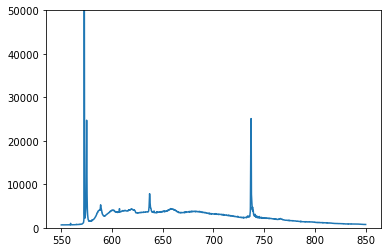

In [5]:
plt.plot(sin['W'],sin['I'])
plt.ylim([0,50000])

In [6]:
sio['W'][findarg(sio['W'], 700)+np.argmax(sio['I'][findarg(sio['W'], 700):findarg(sio['W'], 800)])]

737.1260262691144

(-410.95000000000005, 11555.95)

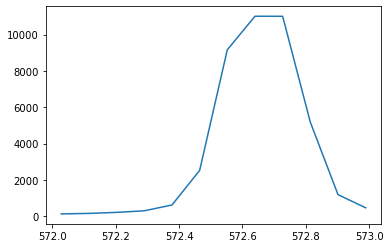

In [7]:
argmin = findarg(sio['W'], 572)
argmax = findarg(sio['W'], 573)

plt.plot(sio['W'][argmin:argmax],sio['I'][argmin:argmax])
plt.ylim()

In [8]:
y1 = bkg_norm(sin)
y2 = bkg_norm(sio)
x = sin['W']

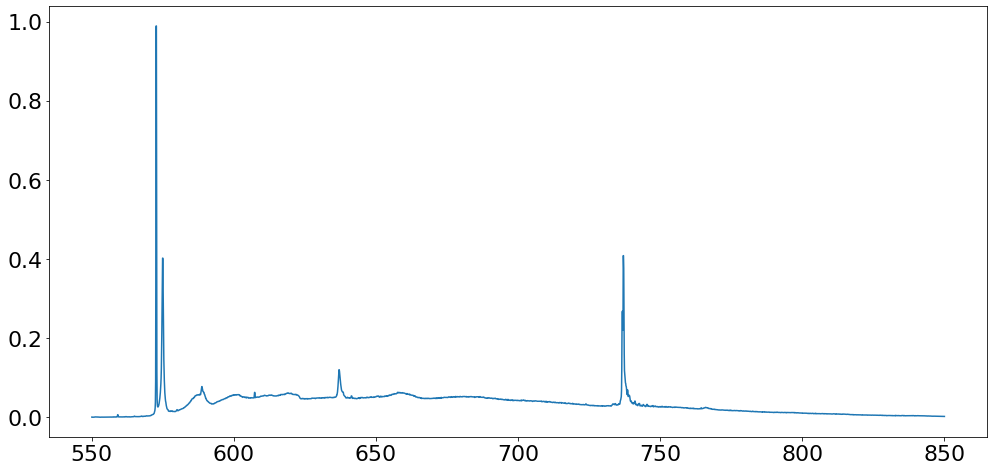

In [9]:
plt.rcParams.update({'font.size': 22})

cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.plot(x,y1)

In [10]:
sio['I'][np.argmax(sio['W'][0:findarg(sio['W'], 575)])]

99

In [11]:
np.argmax(sio['W'][0:findarg(sio['W'], 575)])

286

In [12]:
findarg(sio['W'], 570)

229

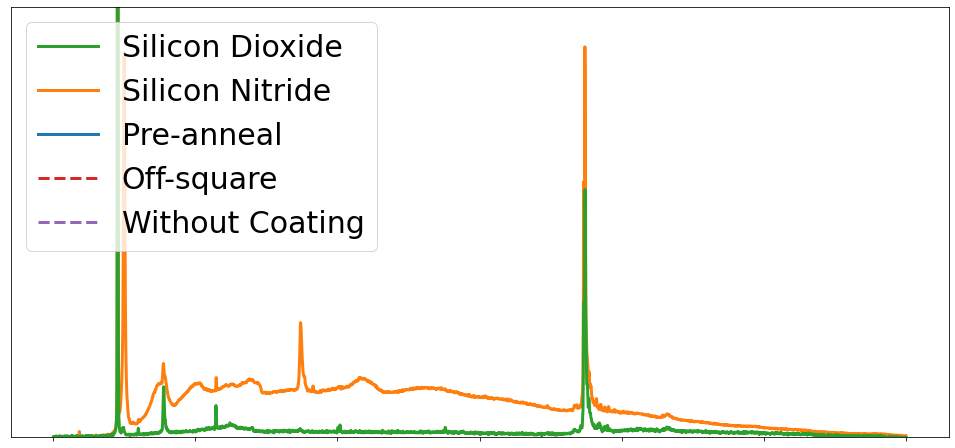

In [13]:
plt.rcParams.update({'font.size': 30})

cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))


plt.plot([],[],label='Pre-anneal', linewidth=3)
plt.plot(x,y1,label='Silicon Nitride', linewidth=3)
plt.plot(x,y2,label='Silicon Dioxide', linewidth=3)
plt.plot([],[],'--', label='Off-square',  linewidth=3)
plt.plot([],[],'--', label='Without Coating',  linewidth=3)



plt.ylim([0,0.45])
# plt.yticks([])
# plt.xticks([550,600,650,700,750,800,850],['550','','','','','','850'])
# no labels below:
plt.yticks([])
plt.xticks([550,600,650,700,750,800,850],['','','','','','',''])
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity (a.u.)')
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,1,0,3,4]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
fig.savefig('LTspectrum_regular.svg', format= 'svg',transparent=True)